In [12]:
# Run this block of code with ctrl + Enter to import the required packages: 
## mesa, 
## numpy for mathematical functions,
## pandas for data manipulation,
## JupyterViz for the model visualization,
## and seaborn and matplotplib for the plots

import mesa
import numpy as np
import pandas as pd
from mesa.experimental import JupyterViz
import seaborn as sns
import matplotlib.pyplot as plt
# to be able to show plots in Jupyter notebook
%matplotlib inline

SyntaxError: invalid syntax (ModularVisualization.py, line 367)

In [10]:
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

# Mesa Tutorial
The goal of this tutorial is to create and visualize the Boltzmann wealth distribution model, which shows how inequality can emerge from simple trading rules. Below two classes are defined, one for the agent, the other for the model. Now, the agents don't interact yet but just print their `unique_id` ("who" attribute in NetLogo).

In a Jupyter notebook, you can execute blocks of code in any order you want, and refer to classes, methods, and variables of one block of code from another. So if an exercise asks you to adapt the `MoneyAgent` and `MoneyModel` classes below, you can just change them within those blocks of code and re-run them using ctrl + Enter.

In [ ]:
# Agent class
# Use ctrl + Enter to run this block of code and define the MoneyAgent class!
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    # This is where we initialize the agent class 
    # (What you would do in the setup procedure in NetLogo)
    def __init__(self, unique_id, model):
        # Pass the parameters to the parent (mesa.Agent) class.
        super().__init__(unique_id, model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def step(self):
        self.move()
        if self.wealth != 0:
           self.give_money()
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        # print(f"Hi, I am an agent, you can call me {str(self.unique_id)}, my wealth is {self.wealth}.")
        #n Python, the f before a string is used to create an f-string, which stands for formatted string. It allows you to embed expressions inside string literals by using curly braces {}.
    def move(self):
            new_position=self.random.choice(self.model.grid.get_neighborhood(self.pos, moore = True, include_center = False))
            self.model.grid.move_agent(self, new_position)
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1    

In [ ]:
# Model class
# Use ctrl + Enter to run this block of code
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    # This is where we initialize the model class 
    # (What you would do in the setup procedure in NetLogo)
    def __init__(self, N,width, height):
        # Pass the parameters to the parent (mesa.Model) class.
        super().__init__()
        self.grid=mesa.space.MultiGrid(width, height, torus = True)
        self.num_agents = N
        self.datacollector = mesa.DataCollector(
        model_reporters = {"Gini": compute_gini}, 
        agent_reporters = {"Wealth": "wealth"})

        # Create scheduler and assign it to the model, defining the which agents will be in the steps
        self.schedule = mesa.time.SimultaneousActivation(self) 
        #note that it is "random" activation
        #you can  use SimultaneousActivation, StagedActivation, or RandomActivation
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self,)
            # Add the agent to the scheduler
            self.schedule.add(a)
            x = self.random.randrange(width)
            y = self.random.randrange(height)
            self.grid.place_agent(a, (x,y))

    def step(self):
        """Advance the model by one step."""
        self.datacollector.collect(self)
        # Now this will call the step method of each agent
        self.schedule.step()

If you run the model now, all agents should report their `unique_id` in a random order. Re-run the `step` method and the order should change.

In [ ]:
# Run the model with 10 agents for 1 step
# starter_model = MoneyModel(10)
# starter_model.step()

**Exercise 1**
See if you can adapt the `MoneyAgent` class so that the agents print their `unique_id` AND `wealth` at every timestep.

**Exercise 2**
We want the agents to be able to give and receive money. Let's adapt the step method in the `MoneyAgent` class so that it:
1. first checks whether the agent has some wealth at all
2. then chooses a random other agent
3. and if there is another agent, increases its wealth by 1 and decreases its own wealth by 1

The agent and model class have a built-in `random` module that we can use to add stochasticity. Use `self.random.choice(<list of agents>)` to pick a random agent from a list of agents, and `self.model.schedule.agents` to access a list of all agents

Your code should look something like this :
``` python
if <condition>:
    other_agent = <randomly pick agent>
    if other_agent is not None:
        self.wealth -= 1 # decrease own wealth with 1
        <code to increase other agent's wealth with 1>
```

If you haven't removed the print statement and run the model for a few steps, you will see the agents' wealth change. With the code below, we can visualize the results a bit better than with print statements

In [ ]:
# # Run the model for 10 steps
# model = MoneyModel(10)
# for i in range(10):
#     model.step()

# # First, create a list of the wealth per active agent in the scheduler.
# agent_wealth = [a.wealth for a in model.schedule.agents]

# # Then, create a histogram with seaborn
# g = sns.histplot(agent_wealth, discrete = True)
# g.set(title = "Wealth distribution", 
#       xlabel = "Wealth", 
#       ylabel = "Number of agents"
# );  # The semicolon is just to avoid printing the object representation

Your output will look different because of the stochasticity of the model, but wealth won't be evenly/uniformly distributed. We can get a better idea of how wealth is distributed by running the model 100 times, each time for 10 timesteps. This way, we smooth out some of the randomness of the model.

In [ ]:
# # Initialize a list of all agents' wealth
# all_wealth = []

# # This runs the model 100 times, each model executing 10 steps.
# for j in range(100):
#     # Run the model
#     model = MoneyModel(10)
#     for i in range(10):
#         model.step()

#     # Store the results in the all_wealth list
#     for agent in model.schedule.agents:
#         all_wealth.append(agent.wealth)

# # Use seaborn to plot the results
# g = sns.histplot(all_wealth, discrete=True)
# g.set(title = "Wealth distribution", 
#       xlabel = "Wealth", 
#       ylabel = "Number of agents");

As you can see, most agents will have 0 wealth, while the number of agents with more wealth gets smaller and smaller. So despite the fact that every agent only give and receive one unit of wealth per timestep, the model converges to a point where most agents have little and only some agents have a lot.

We haven't added a spatial element yet, but note that this doesn't make this model any less "agent-based". There are agents interacting with each other according to simple rules, and an interesting pattern has emerged from this: an uneven distribution of wealth.

**Exercise 3**
Now let's add space to the model. In Mesa you have the option to add space in the form of a grid, or in the form of a continuous space. In grid space, agents can only be on a particular cell (patch in NetLogo). In continuous space, agents can be anywhere. Like in Netlogo, the world wraps around horizontally and vertically by default, so that each grid cell has the same number of neighbours.

The two main types of grids are `SingleGrid` and `MultiGrid`. `SingleGrid` allows only one agent per cell, `MultiGrid` allows multiple.

Go to your `MoneyModel` class and add a `self.grid` in the `__init__` method. Choose `MultiGrid` to allow multiple agents to occupy one cell, and let the world wrap around both sides with `torus = True`: `mesa.space.MultiGrid(width, height, torus = True)`. Don't forget to add the width and height parameters to the `__init__` method.

**Exercise 4**
Now we can use `self.grid` to place our agents at random locations. Note that in Mesa, the `(0, 0)` coordinates are in the bottom left corner. Just like we can use "max-pxcor" and "max-pycor" to find the maximum x and y coordinates in NetLogo, we can use `self.grid.width` and `self.grid.height` to find the maximum x and y coordinates in Mesa. We can use this to pick a random x and y variable from a range. Note that `random.randrange(n)` works the same as "random-float n" in NetLogo: it reports a random number 0 <= x < n.

1. First declare a random x variable: `x = self.random.randrange(<maximum width>)`
2. Then declare a random y variable: `y = self.random.randrange(<maximum height>)`
3. Use `self.grid.place_agent(<agent>, <location>)` to place the agent at coordinates `(x, y)`

You could now run the model, but the grid and the agents' location in that grid do not affect their behaviour yet: they still trade with other random agents regardless of where they are located.

**Exercise 5**
Now that we have created space, we need to add to the agents' behaviour, to allow them to move through space,  and only let them give money to agents occupying the same cell. For this, we can create a `move` method in the `MoneyAgent` class

We can define a new method with 
```python
def move(self):
    
```
just like the `step` and `__init__` method.

In this move method, do the following:
1. Define a list of possible steps an agent can take, using `self.model.grid.get_neighborhood(self.pos, moore = True, include_center = False)`
2. Just like in the `MoneyAgent` `step` method we let the agents pick a random other agent from a list, now pick a random "new_position" from our list of possible steps
3. Use `self.model.grid.move_agent(<agent>, <new_position>)` to move the agent to this random neighboring cell. You can use "self" to refer to the current agent that is executing this step.

Mesa grid space has a built-in method `get_neighborhood`, which reports neighboring cells, and takes as input
- The current agent position
- Whether a neighborhood consists of 4 or 8 neighbors
- Whether the current cell position is included: 

Like in NetLogo, you can choose whether to only include 4 neighbors (Moore), or all 8, also including the diagonal neighbors (Von Neumann). `Moore = True` means only 4 neighbors. An agent shouldn't be able to move to the cell it's already in, hence `include_center = False`. 

**Exercise 6**
Similarly to exercise 5, now add a `MoneyAgent` method called `give_money`, which agents use to give money to a random agent occupying the same cell.

In this method, do the following:
1. Use `self.model.grid.get_cell_list_contents(<current position>)` to define a list of "cellmates"
2. Remove `self` from list of cellmates, so an agent cannot give money to itself: `cellmates.pop(cellmates.index(self))`
3. Check if there are any other cellmates using `len(cellmates)`
4. and if so, pick a random other cellmate in the same way we picked a random other agent in the `MoneyAgent` step method, using `self.random.choice`
5. Increase the wealth of the random other cellmate with 1, and decrease the agent's own wealth with 1

The method `get_cell_list_contents` takes as input the agent's position, and returns a list of agents occupying that cell. From that list, a random agent is then chosen to give wealth to. Note that wealth can only be given to another agent if there is one, hence checking if `len(cellmates)` is bigger than 1.

**Exercise 7**
Finally, we need to update the `MoneyAgent`'s `step` method so that it uses the `move` and `give_money` methods we just created. At every timestep, an agent should move, and if it has any wealth, it should give it to one of its cellmates.

Adapt the `MoneyAgent` `step` method as follows:
1. Use `self.move()` to execute the `MoneyAgent` `move` method we have just defined
2. Check if the agent's wealth is larger than 0,
3. and if so, use `self.give_money()` to execute the give_money method we have just defined

**Exercise 8**
Just to see if everything is working, create a model with 100 agents on a 10x10 grid and run it for 20 steps. You can adapt the code we have used earlier to run the model.

Note that `MoneyModel` now takes 3 inputs instead of 1: number of agents, width, and height.

We could now run the model 100 times again, and plot the wealth distributions in a histogram like before. The problem is that this isn't very efficient, and only gives us the result at the end of the model runs. If we want to know the wealth of each agent at each timestep, 
we can use the built-in `DataCollector`.

The Mesa `DataCollector` can store data at both the agent level and the model level. At the agent level, we want to collect the wealth at each timestep. At the model level, we might be interested in the model's `Gini coefficient`, which is a measure of wealth inequality. We can define a function that calculates this coefficient for us.

Don't worry too much about how it is calculated. It reports a number between 0 and 1 (or a percentage), with 0 meaning a uniform distribution of wealth, and 1 meaning that one single person has all the wealth, while the rest has zero wealth.

In [ ]:
# Run this block of code to define a function that calculates the gini coefficient of a model
def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum(xi * (N - i) for i, xi in enumerate(x)) / (N * sum(x))
    return 1 + (1 / N) - 2 * B

**Exercise 9**
1. Now add a datacollector to the `__init__` method of the `MoneyModel` class, using:
```python
self.datacollector = mesa.DataCollector(
    model_reporters = {"Gini": compute_gini}, 
    agent_reporters = {"Wealth": "wealth"}
)
```
2. Also add `self.datacollector.collect(self)` to `MoneyModel`'s `step` method, so data is collected at each step.
3. Finally, create a model with 100 agents on a 10x10 grid and run it for 20 steps, so we can analyze the results.

Mesa works with the Python package called `pandas`, which is a data analysis and manipulation tool, similar to dplyr/tidyverse in R.

We now plot the gini coefficient over time, and the wealth distribution at the end of the model run, with the data we collected using the Mesa `Datacollector`.

C:\Users\garin\AppData\Roaming\Python\Python311\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


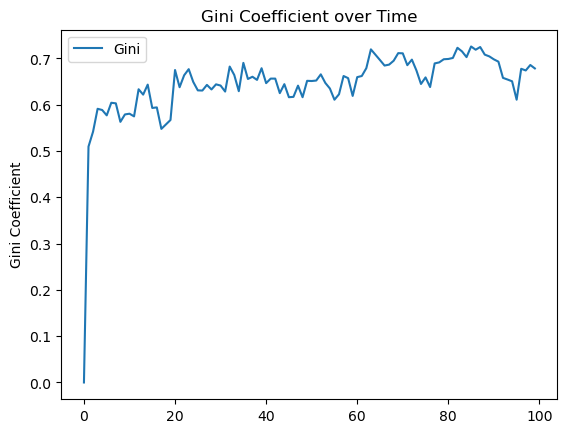

In [ ]:
# Save the collected model variables (the gini coefficient)
model = MoneyModel(100,10,10)
for i in range(100):
    model.step()
gini = model.datacollector.get_model_vars_dataframe()
# Plot the Gini coefficient over time
g = sns.lineplot(data = gini)
g.set(title = "Gini Coefficient over Time", 
      ylabel = "Gini Coefficient");

# As you will see, inequality increases over time and then levels off.

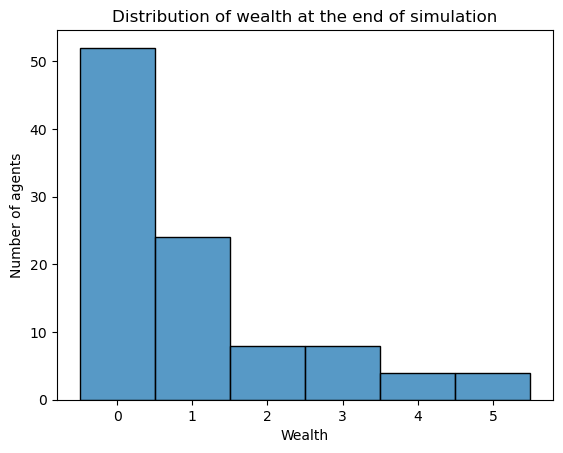

In [ ]:
# We can also plot the distribution of wealth at the end of the simulation.

# Save the collected agent variables (the agent wealth)
agent_wealth = model.datacollector.get_agent_vars_dataframe()

# Get the wealth at the last timestep and plot it in a histogram
last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level = "Step")["Wealth"]

# Create a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete = True)
g.set(
    title = "Distribution of wealth at the end of simulation",
    xlabel = "Wealth",
    ylabel = "Number of agents",
);

We can see now that visualization of your model can mean different things. In NetLogo, the World in the interface is always shown, which might make you think that it is a necessity to visualize your agents like that. But if the only output we want to analyze is the wealth distribution at the end of the model run, we might not care about the intermediate positions of agents or what that looks like visually. These positions are in the end just coordinates, which can be expressed in numbers.

Of course, visualization will greatly increase your and other people's understanding of the model and can help you find bugs in your agent behaviour. Because NetLogo makes visualization so quick and easy, I would recommend it if you have little time (like in this course), or if you just want to explore an idea.

Nevertheless, below are three ways to visualize the Boltzmann wealth distribution model.

### Visualization 1
One way to visualize this model is by plotting each grid cell and its corresponding number of agents.

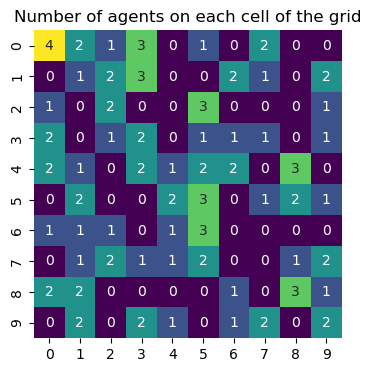

In [ ]:
# Initialize a matrix, with each position corresponding to a cell on the grid
agent_counts = np.zeros((model.grid.width, model.grid.height))

# model.grid.coord_iter() returns cell contents and cell position
# Per cell...
for cell_content, (x, y) in model.grid.coord_iter():
    # ... count the agents on the cell
    agent_count = len(cell_content)
    # ... add that count to the corresponding position in our matrix
    agent_counts[x][y] = agent_count
    
# Plot using seaborn, with a size of 5x5
g = sns.heatmap(agent_counts, 
                cmap = "viridis",    # determines color gradient  
                annot = True,        # adds annotation to each cell
                cbar = False,        # removes color legend
                square = True)
g.figure.set_size_inches(4, 4)
g.set(title = "Number of agents on each cell of the grid");

### Visualization 2
We could create the above plot for each timestep and compare the results, but it would be more convenient to have a dynamically updating world, just like in NetLogo. To do that, we can use the `matplotlib` package.

In [ ]:
# We first need to define an agent portrayal, 
# using a type of object called a dictionary (also used in the mesa datacollector!)
def agent_portrayal(agent):
    return {
        "color": "blue",
        "size": 50,
    }

# Next, we choose initial values for our model parameters,
# as well as methods to change them.
# In NetLogo, you would add sliders to the interface.
model_params = {
    "N": {
        "type": "SliderInt",
        "value": 50,
        "label": "Number of agents:",
        "min": 10,
        "max": 100,
        "step": 1,
    },
    "width": 10,
    "height": 10,
}

# Then, we use JupyterViz to visualize our model dynamically,
# with the agent portrayal and model parameters we just defined
page = JupyterViz(
    MoneyModel,
    model_params,
    measures = ["Gini"],
    name = "Money Model",
    agent_portrayal = agent_portrayal,
)

# run the visualization
page

Cannot show ipywidgets in text

{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}


**Exercise 10**
Change the model parameters so that width and height are also changeable sliders, and see if there is any effect on the gini coefficient if you change width and height.

**Exercise 11**
Now, we can't see any differences between our agents, but we can use an if-statement in the `agent_portrayal` to draw broke agents as red.

Adapt the `agent_portrayal` so that
1. If an agent has no wealth, its size is 10 and its color is red
2. If an agent has any wealth, its size is 50 and its color blue

### Visualization 3
Another way to visualize your Mesa model is with JavaScript, but this is a bit too much to explain for this tutorial. If you already know Python and how to make plots, the method explained above is more versatile and easier to use.

The code below might throw some errors if you run it in a Jupyter notebook.

In [ ]:
def agent_portrayal(agent):
    portrayal = {"Shape": "circle", "Filled": "true", "r": 0.5}

    if agent.wealth == 0:
            portrayal["Color"] = "grey"
            portrayal["Layer"] = 2
            portrayal["r"] = 0.2
    elif agent.wealth > 0 and agent.wealth <= 3:
        portrayal["Color"] = "yellow"
        portrayal["Layer"] = 1
        portrayal["r"] = 0.5
    else :
        portrayal["Color"] = "red"
        portrayal["Layer"] = 0
        portrayal["r"] = 1
    return portrayal


grid = mesa.visualization.CanvasGrid(agent_portrayal, 10, 10, 500, 500)
chart = mesa.visualization.ChartModule(
    [{"Label": "Gini", "Color": "Black"}], data_collector_name="datacollector"
)

server = mesa.visualization.ModularServer(
    MoneyModel, [grid, chart], "Money Model", {"N": 100, "width": 10, "height": 10}
)
server.port = 8510 # change port number if it gives an error
server.launch()



NameError: name 'mesa' is not defined